In [66]:
using Pkg
Pkg.activate(pwd())
Pkg.instantiate()
Pkg.status()

  Activating project at `~/Documents/github.com/ucla-biostat-216/2023fall/slides/12-svd`


Status `~/Documents/github.com/ucla-biostat-216/2023fall/slides/12-svd/Project.toml`
  [916415d5] Images v0.26.0
  [91a5bcdd] Plots v1.39.0
  [ce6b1742] RDatasets v0.7.7
  [2913bbd2] StatsBase v0.34.2
  [3eaba693] StatsModels v0.7.3
  [f3b207a7] StatsPlots v0.15.6
  [37e2e46d] LinearAlgebra


In [67]:
using Images, LinearAlgebra, Random, RDatasets, StatsBase, StatsModels, StatsPlots
gr() # GR backend

Plots.GRBackend()

## SVD introduction

- We saw in earlier lectures that a square matrix can have complex eigenvalues and eigenvectors. Symmetric matrices have the nice property that all eigenvalues and eigenvectors are real. The singular value decomposition (SVD) generalizes the spectral decomposition to general rectangular matrices.

- Applied mathematicians and statisticians call SVD the [**singularly (most) valuable decomposition**](https://doi.org/10.1080/07468342.1996.11973744). 

- Let $\mathbf{A} \in \mathbb{R}^{m \times n}$ with $\text{rank}(\mathbf{A})=r$. We assume $m \ge n$. Instead of the eigen-equation, now we have  
$$
\begin{align}
\mathbf{A} \mathbf{v}_i &= \sigma_i \mathbf{u}_i, \quad i = 1,\ldots,r \\
\mathbf{A} \mathbf{v}_i &= 0 \, \mathbf{u}_i, \quad i = r+1,\ldots,n,
\end{align}
$$
where the **left singular vectors** $\mathbf{u}_i \in \mathbb{R}^m$ are orthonormal, the **right singular vectors** $\mathbf{v}_i \in \mathbb{R}^n$ are orthonormal, and the **singular values** 
$$
\sigma_1 \ge \cdots \ge \sigma_r > \sigma_{r+1} = \cdots = \sigma_{n} = 0.
$$

- Collecting above equations into matrix multiplication format:
$$
\mathbf{A} \begin{pmatrix} \mid & & \mid & & \mid \\ \mathbf{v}_1 & \cdots & \mathbf{v}_r & \cdots & \mathbf{v}_n \\ \mid & & \mid & & \mid \end{pmatrix} = \begin{pmatrix} \mid & & \mid & & \mid \\ \mathbf{u}_1 & \cdots & \mathbf{u}_r & \cdots & \mathbf{u}_n \\ \mid & & \mid & & \mid \end{pmatrix} \begin{pmatrix} \sigma_1 & & & \\ & \ddots & & \\ & & \sigma_r & \\ & & & \mathbf{O}_{n-r} \end{pmatrix},
$$
or
$$
\mathbf{A} \mathbf{V} = \mathbf{U} \boldsymbol{\Sigma}.
$$
Multiplying both sides by $\mathbf{V}'$, we have the famous **singular value decomposition (SVD)**
$$
\mathbf{A} = \mathbf{U} \boldsymbol{\Sigma} \mathbf{V}' = \sigma_1 \mathbf{u}_1 \mathbf{v}_1' + \cdots + \sigma_r \mathbf{u}_r \mathbf{v}_r',
$$
where $\mathbf{U} \in \mathbb{R}^{m \times n}$ has orthogonal columns, $\boldsymbol{\Sigma} = \text{diag}(\sigma_1, \ldots, \sigma_r, \mathbf{0}_{n-r})$, and $\mathbf{V} \in \mathbb{R}^{n \times n}$ is orthogonal.
$$
\mathbf{A} = \begin{pmatrix} \mid & & \mid \\ \mathbf{u}_1 & \cdots & \mathbf{u}_n \\ \mid & & \mid \end{pmatrix} \begin{pmatrix} \sigma_1 & & & \\ & \ddots & & \\ & & \sigma_r & \\ & & & \mathbf{O}_{n-r} \end{pmatrix} \begin{pmatrix} - & \mathbf{v}_1' & -\\  & \vdots & \\ - & \mathbf{v}_n' & - \end{pmatrix}.
$$

In [68]:
# a square matrix
A = [3.0 0.0; 4.0 5.0]

2×2 Matrix{Float64}:
 3.0  0.0
 4.0  5.0

In [69]:
# eigenvalues and eigenvectors
eigen(A)

Eigen{Float64, Float64, Matrix{Float64}, Vector{Float64}}
values:
2-element Vector{Float64}:
 3.0
 5.0
vectors:
2×2 Matrix{Float64}:
  0.447214  0.0
 -0.894427  1.0

In [70]:
# singular values and singular vectors
# different from eigenvalues and eigenvectors
Asvd = svd(A)

SVD{Float64, Float64, Matrix{Float64}, Vector{Float64}}
U factor:
2×2 Matrix{Float64}:
 -0.316228  -0.948683
 -0.948683   0.316228
singular values:
2-element Vector{Float64}:
 6.70820393249937
 2.2360679774997894
Vt factor:
2×2 Matrix{Float64}:
 -0.707107  -0.707107
 -0.707107   0.707107

In [71]:
A * Asvd.Vt[1, :]

2-element Vector{Float64}:
 -2.1213203435596424
 -6.363961030678928

In [72]:
Asvd.S[1] * Asvd.U[1, :]

2-element Vector{Float64}:
 -2.1213203435596433
 -6.363961030678928

In [73]:
# orthogonality of U
Asvd.U'Asvd.U

2×2 Matrix{Float64}:
 1.0          1.11022e-16
 1.11022e-16  1.0

In [74]:
# orthogonality of V
Asvd.V'Asvd.V

2×2 Matrix{Float64}:
 1.0  0.0
 0.0  1.0

In [75]:
A ≈ Asvd.U * Diagonal(Asvd.S) * Asvd.V'

true

- **Reduced form of the SVD.** If we just keep the first $r$ singular triplets ($\sigma_i, \mathbf{u}_i, \mathbf{v}_i$), then
$$
\mathbf{A} = \mathbf{U}_r \boldsymbol{\Sigma}_r \mathbf{V}_r',
$$
where $\mathbf{U}_r \in \mathbb{R}^{m \times r}$, $\boldsymbol{\Sigma}_r = \text{diag}(\sigma_1, \ldots, \sigma_r)$, and $\mathbf{V}_r \in \mathbb{R}^{n \times r}$
$$
\mathbf{A} = \begin{pmatrix} \mid & & \mid \\ \mathbf{u}_1 & \cdots & \mathbf{u}_r \\ \mid & & \mid \end{pmatrix} \begin{pmatrix} \sigma_1 & & \\ & \ddots & \\ & & \sigma_r \end{pmatrix} \begin{pmatrix} - & \mathbf{v}_1' & -\\  & \vdots & \\ - & \mathbf{v}_r' & - \end{pmatrix}.
$$

- **Full SVD.** Opposite to the reduced form of SVD, we can also augment the $\mathbf{U}$ matrix to be a square orthogonal matrix to obtain the **full SVD**
$$
\mathbf{A} = \begin{pmatrix} \mid & & \mid \\ \mathbf{u}_1 & \cdots & \mathbf{u}_m \\ \mid & & \mid \end{pmatrix} \begin{pmatrix} \sigma_1 & & & \\ & \ddots & & \\ & & \sigma_r & \\ & & & \mathbf{O}_{n-r} \\ \\ \\ & & \mathbf{O}_{m-n, n} \end{pmatrix} \begin{pmatrix} - & \mathbf{v}_1' & - \\
& \vdots & \\ - & \mathbf{v}_n' & - \end{pmatrix}.
$$

In [76]:
Random.seed!(216)
m, n, r = 5, 3, 2
# a rank r matrix by rank factorization
A = randn(m, r) * randn(r, n)

5×3 Matrix{Float64}:
  1.19194   -1.06587    -0.282852
 -0.782863   0.582771    0.49484
  1.35372   -0.920401   -1.08576
  0.629091  -0.529823   -0.235526
 -0.129245   0.0789172   0.127265

In [77]:
# svd: U is mxn, Σ is nxn, V is nxn
# SVD
svd(A)

SVD{Float64, Float64, Matrix{Float64}, Vector{Float64}}
U factor:
5×3 Matrix{Float64}:
 -0.550507    0.73403   -0.377853
  0.382519    0.107063  -0.581891
 -0.677041   -0.623757  -0.294483
 -0.296395    0.223011   0.647996
  0.0662395   0.104547   0.109596
singular values:
3-element Vector{Float64}:
 2.8564495864018364
 0.5518082957047505
 9.264786667098172e-17
Vt factor:
3×3 Matrix{Float64}:
 -0.723686   0.558421  0.405518
  0.133192  -0.463537  0.87601
  0.677155   0.687968  0.261078

In [78]:
# full SVD
svd(A, full=true)

SVD{Float64, Float64, Matrix{Float64}, Vector{Float64}}
U factor:
5×5 Matrix{Float64}:
 -0.550507    0.73403   -0.377853  -0.123969      0.0010295
  0.382519    0.107063  -0.581891   0.709097      0.0283201
 -0.677041   -0.623757  -0.294483   0.211976      0.144528
 -0.296395    0.223011   0.647996   0.660968     -0.0750914
  0.0662395   0.104547   0.109596  -0.000970805   0.98624
singular values:
3-element Vector{Float64}:
 2.8564495864018364
 0.5518082957047505
 9.264786667098172e-17
Vt factor:
3×3 Matrix{Float64}:
 -0.723686   0.558421  0.405518
  0.133192  -0.463537  0.87601
  0.677155   0.687968  0.261078

## SVD tells us everything about a matrix

<img src="../04-vecsp/four_fundamental_subspaces.png" width=400 align="center"/>

- **SVD and four fundamental subspaces.** Given the **full SVD**  
$$
\begin{eqnarray*}
\mathbf{A} &=& \begin{pmatrix} \mid & & \mid & \mid & & \mid \\ \mathbf{u}_1 & \cdots & \mathbf{u}_r & \mathbf{u}_{r+1} & \cdots & \mathbf{u}_m \\ \mid & & \mid & \mid & & \mid \end{pmatrix} \begin{pmatrix} \sigma_1 & & & \\ & \ddots & & \\ & & \sigma_r & \\ & & & \mathbf{O}_{n-r} \\ \\ & & \mathbf{O}_{m-n, n} & \end{pmatrix} \begin{pmatrix} - & \mathbf{v}_1' & - \\ & \vdots & \\ - & \mathbf{v}_r' & - \\ - & \mathbf{v}_{r+1}' & - \\ & \vdots & \\ - & \mathbf{v}_n' & - \end{pmatrix} \\
&=& \begin{pmatrix} \mathbf{U}_r & \mathbf{U}_{m-r} \end{pmatrix} \begin{pmatrix} \boldsymbol{\Sigma}_r & & \\ & & \mathbf{O}_{n-r} \\ \\ & \mathbf{O}_{m-n,n} & \end{pmatrix} \begin{pmatrix} \mathbf{V}_r' \\ \mathbf{V}_{n-r}' \end{pmatrix},
\end{eqnarray*}
$$
Then
    1. $\mathcal{C}(\mathbf{A}) = \mathcal{C}(\mathbf{U}_r)$;  $\quad \mathbf{U}_r \mathbf{U}_r'$ is the orthogonal projector into $\mathcal{C}(\mathbf{A})$.
    2. $\mathcal{N}(\mathbf{A}') = \mathcal{C}(\mathbf{U}_{m-r})$; $\quad \mathbf{U}_{m-r} \mathbf{U}_{m-r}'$ is the orthogonal projector into $\mathcal{N}(\mathbf{A}')$.
    3. $\mathcal{C}(\mathbf{A}') = \mathcal{C}(\mathbf{V}_{r})$; $\quad \mathbf{V}_{r} \mathbf{V}_{r}'$ is the orthogonal projector into $\mathcal{C}(\mathbf{A}')$.
    4. $\mathcal{N}(\mathbf{A}) = \mathcal{C}(\mathbf{V}_{n-r})$; $\quad \mathbf{V}_{n-r} \mathbf{V}_{n-r}'$ is the orthogonal projector into $\mathcal{N}(\mathbf{A})$.
    
- $\text{rank}(\mathbf{A}) = r = \text{\# positive singular values}$.  

- **Frobenius norm** $\|\mathbf{A}\|_{\text{F}}^2 = \sum_{i,j} a_{ij}^2 = \text{tr}(\mathbf{A}' \mathbf{A}) = \sum_i \sigma_i^2$.

- **Spectral norm** or **$\ell_2$ matrix norm** : $\|\mathbf{A}\|_2 = \max \frac{\|\mathbf{A} \mathbf{x}\|}{\|\mathbf{x}\|} = \sigma_1$.

In [79]:
Random.seed!(216)
# generate a rank deficient matrix
m, n, r = 5, 3, 2
A = randn(m, r) * randn(r, n)
# full svd
Asvd = svd(A, full=true)

SVD{Float64, Float64, Matrix{Float64}, Vector{Float64}}
U factor:
5×5 Matrix{Float64}:
 -0.550507    0.73403   -0.377853  -0.123969      0.0010295
  0.382519    0.107063  -0.581891   0.709097      0.0283201
 -0.677041   -0.623757  -0.294483   0.211976      0.144528
 -0.296395    0.223011   0.647996   0.660968     -0.0750914
  0.0662395   0.104547   0.109596  -0.000970805   0.98624
singular values:
3-element Vector{Float64}:
 2.8564495864018364
 0.5518082957047505
 9.264786667098172e-17
Vt factor:
3×3 Matrix{Float64}:
 -0.723686   0.558421  0.405518
  0.133192  -0.463537  0.87601
  0.677155   0.687968  0.261078

In [80]:
# Frobenius norm
norm(A) ≈ norm(Asvd.S)

true

In [81]:
# orthogonal projector to C(A)
P1 = A * pinv(A'A) * A' # WARNING: this is very inefficient code; take Biostat 257

5×5 Matrix{Float64}:
  0.841858   -0.131992   -0.0851415   0.326864     0.0402755
 -0.131992    0.157783   -0.325762   -0.0895006    0.0365309
 -0.0851415  -0.325762    0.847457    0.0615673   -0.110059
  0.326864   -0.0895006   0.0615673   0.137584     0.00368202
  0.0402755   0.0365309  -0.110059    0.00368202   0.0153178

In [82]:
# orthognal projector to C(A)
P2 = Asvd.U[:, 1:2] * Asvd.U[:, 1:2]'

5×5 Matrix{Float64}:
  0.841858   -0.131992   -0.0851415   0.326864     0.0402755
 -0.131992    0.157783   -0.325762   -0.0895006    0.0365309
 -0.0851415  -0.325762    0.847457    0.0615673   -0.110059
  0.326864   -0.0895006   0.0615673   0.137584     0.00368202
  0.0402755   0.0365309  -0.110059    0.00368202   0.0153178

In [83]:
# they should be equal by the uniqueness of orthogonal projector
P1 ≈ P2

true

## Proof of existence of SVD using eigen-decomposition of Gram matrix

- **Relating SVD to eigen-decomposition.** From SVD $\mathbf{A} = \mathbf{U} \boldsymbol{\Sigma} \mathbf{V}'$, we have
$$
\begin{eqnarray*}
    \mathbf{A}' \mathbf{A} &=& (\mathbf{V} \boldsymbol{\Sigma} \mathbf{U}') (\mathbf{U} \boldsymbol{\Sigma} \mathbf{V}') = \mathbf{V} \boldsymbol{\Sigma}^2 \mathbf{V}' \\
    \mathbf{A} \mathbf{A}' &=& (\mathbf{U} \boldsymbol{\Sigma} \mathbf{V}') (\mathbf{V} \boldsymbol{\Sigma} \mathbf{U}') = \mathbf{U} \boldsymbol{\Sigma}^2 \mathbf{U}'.
\end{eqnarray*}
$$
This says 
    - $\mathbf{u}_i$ are simply the eigenvectors of the symmetric matrix $\mathbf{A} \mathbf{A}'$
    - $\mathbf{v}_i$ are simply the eigenvectors of the symmetric matrix $\mathbf{A}' \mathbf{A}$
    - $\sigma_i$ are simply $\sqrt{\lambda_i}$.
    
    Proof of existence of SVD: Start from positive eigenvalues $\lambda_i > 0$ and corresponding (orthonormal) eigenvectors $\mathbf{v}_i$ of $\mathbf{A}' \mathbf{A}$. Set $\sigma_i = \sqrt \lambda_i$ and
$$
\mathbf{u}_i = \frac{\mathbf{A} \mathbf{v}_i}{\sigma_i}, \quad i = 1,\ldots,r.
$$
Verify that $\mathbf{u}_i$ are orthonormal. Lastly, augment $\mathbf{u}_i$s by an orthonormal basis in $\mathcal{N}(\mathbf{A}')$ and augment $\mathbf{v}_i$s by an orthonormal basis in $\mathcal{N}(\mathbf{A})$.

In [84]:
# revisit our earlier 5-by-3, rank-2 matrix
A

5×3 Matrix{Float64}:
  1.19194   -1.06587    -0.282852
 -0.782863   0.582771    0.49484
  1.35372   -0.920401   -1.08576
  0.629091  -0.529823   -0.235526
 -0.129245   0.0789172   0.127265

In [85]:
# full SVD
Asvd

SVD{Float64, Float64, Matrix{Float64}, Vector{Float64}}
U factor:
5×5 Matrix{Float64}:
 -0.550507    0.73403   -0.377853  -0.123969      0.0010295
  0.382519    0.107063  -0.581891   0.709097      0.0283201
 -0.677041   -0.623757  -0.294483   0.211976      0.144528
 -0.296395    0.223011   0.647996   0.660968     -0.0750914
  0.0662395   0.104547   0.109596  -0.000970805   0.98624
singular values:
3-element Vector{Float64}:
 2.8564495864018364
 0.5518082957047505
 9.264786667098172e-17
Vt factor:
3×3 Matrix{Float64}:
 -0.723686   0.558421  0.405518
  0.133192  -0.463537  0.87601
  0.677155   0.687968  0.261078

In [86]:
eigen(A'A)

Eigen{Float64, Float64, Matrix{Float64}, Vector{Float64}}
values:
3-element Vector{Float64}:
 1.1602462487443106e-16
 0.3044923952085812
 8.159304239655214
vectors:
3×3 Matrix{Float64}:
 0.677155   0.133192   0.723686
 0.687968  -0.463537  -0.558421
 0.261078   0.87601   -0.405518

In [87]:
eigen(A * A')

Eigen{Float64, Float64, Matrix{Float64}, Vector{Float64}}
values:
5-element Vector{Float64}:
 -5.87350676578423e-16
  8.232088110842731e-18
  1.330784281188572e-16
  0.30449239520858096
  8.159304239655212
vectors:
5×5 Matrix{Float64}:
  0.393935  -0.0405875    0.0361904   0.73403   -0.550507
  0.406767  -0.036814    -0.821829    0.107063   0.382519
  0.252929   0.110912    -0.276167   -0.623757  -0.677041
 -0.784463  -0.00371055  -0.497011    0.223011  -0.296395
  0.0        0.992312     0.0         0.104547   0.0662395

## Another relation of SVD to eigen-decomposition

In the full SVD, partition the $\mathbf{U} \in \mathbb{R}^{m \times m}$ as
$$
\mathbf{U} = \begin{pmatrix} \mathbf{U}_n & \mathbf{U}_{m-n} \end{pmatrix},
$$
where $\mathbf{U}_n \in \mathbb{R}^{m \times n}$ and $\mathbf{U}_{m-n} \in \mathbb{R}^{m \times (m - n)}$. Let $\boldsymbol{\Sigma} = \text{diag}(\sigma_1, \ldots, \sigma_n)$. Then
$$
\begin{pmatrix} \mathbf{O}_n & \mathbf{A}' \\ \mathbf{A} & \mathbf{O}_m \end{pmatrix} = \frac{1}{\sqrt 2} \begin{pmatrix} \mathbf{V} & \mathbf{V} & \mathbf{O} \\ \mathbf{U}_n & - \mathbf{U}_n & \sqrt{2} \mathbf{U}_{m-n} \end{pmatrix} \begin{pmatrix} \boldsymbol{\Sigma} & & \\ & - \boldsymbol{\Sigma} & \\ & & \mathbf{O}_{m-n} \end{pmatrix} \frac{1}{\sqrt 2} \begin{pmatrix} \mathbf{V}' & \mathbf{U}_n' \\ \mathbf{V}' & - \mathbf{U}_n' \\ \mathbf{O} & \sqrt{2} \mathbf{U}_{m-n}' \end{pmatrix}.
$$

In [88]:
A

5×3 Matrix{Float64}:
  1.19194   -1.06587    -0.282852
 -0.782863   0.582771    0.49484
  1.35372   -0.920401   -1.08576
  0.629091  -0.529823   -0.235526
 -0.129245   0.0789172   0.127265

In [89]:
svd(A)

SVD{Float64, Float64, Matrix{Float64}, Vector{Float64}}
U factor:
5×3 Matrix{Float64}:
 -0.550507    0.73403   -0.377853
  0.382519    0.107063  -0.581891
 -0.677041   -0.623757  -0.294483
 -0.296395    0.223011   0.647996
  0.0662395   0.104547   0.109596
singular values:
3-element Vector{Float64}:
 2.8564495864018364
 0.5518082957047505
 9.264786667098172e-17
Vt factor:
3×3 Matrix{Float64}:
 -0.723686   0.558421  0.405518
  0.133192  -0.463537  0.87601
  0.677155   0.687968  0.261078

In [90]:
B = [zeros(n, n) A';
    A zeros(m, m)]

8×8 Matrix{Float64}:
  0.0        0.0         0.0       …   1.35372    0.629091  -0.129245
  0.0        0.0         0.0          -0.920401  -0.529823   0.0789172
  0.0        0.0         0.0          -1.08576   -0.235526   0.127265
  1.19194   -1.06587    -0.282852      0.0        0.0        0.0
 -0.782863   0.582771    0.49484       0.0        0.0        0.0
  1.35372   -0.920401   -1.08576   …   0.0        0.0        0.0
  0.629091  -0.529823   -0.235526      0.0        0.0        0.0
 -0.129245   0.0789172   0.127265      0.0        0.0        0.0

In [91]:
Beig = eigen(B)

Eigen{Float64, Float64, Matrix{Float64}, Vector{Float64}}
values:
8-element Vector{Float64}:
 -2.8564495864018284
 -0.5518082957047472
 -6.97468760497341e-17
 -4.058147106662535e-17
  4.4143103480860525e-18
  2.220446049250313e-15
  0.551808295704753
  2.856449586401836
vectors:
8×8 Matrix{Float64}:
  0.511723   -0.0941807  -0.249106    0.492172   …  -0.0941807  -0.511723
 -0.394863    0.32777    -0.253084    0.500031       0.32777     0.394863
 -0.286745   -0.619432   -0.0960433   0.189758      -0.619432    0.286745
 -0.389267    0.519038   -0.199383    0.145704      -0.519038   -0.389267
  0.270481    0.0757048   0.502333    0.617501      -0.0757048   0.270481
 -0.47874    -0.441063    0.118773    0.256303   …   0.441063   -0.47874
 -0.209583    0.157692    0.747309   -0.0591521     -0.157692   -0.209583
  0.0468384   0.073926    0.0         0.0           -0.073926    0.0468384

In [92]:
# reorder eigenvalues
p = [8, 7, 6, 1, 2, 3, 5, 4]
Beigvec = Beig.vectors[:, p]

8×8 Matrix{Float64}:
 -0.511723   -0.0941807  -2.53979e-17  …  -0.249106    0.392749   0.492172
  0.394863    0.32777     1.38401e-16     -0.253084    0.39902    0.500031
  0.286745   -0.619432   -2.93162e-16     -0.0960433   0.151425   0.189758
 -0.389267   -0.519038   -0.0405875       -0.199383   -0.309049   0.145704
  0.270481   -0.0757048  -0.036814         0.502333   -0.455209   0.617501
 -0.47874     0.441063    0.110912     …   0.118773   -0.245852   0.256303
 -0.209583   -0.157692   -0.00371055       0.747309    0.548117  -0.0591521
  0.0468384  -0.073926    0.992312         0.0         0.0        0.0

In [93]:
# this should be Vᵣ
Beigvec[1:n, 1:r] * sqrt(2)

3×2 Matrix{Float64}:
 -0.723686  -0.133192
  0.558421   0.463537
  0.405518  -0.87601

In [94]:
# this should be Uᵣ
Beigvec[n+1:end, 1:r] * sqrt(2)

5×2 Matrix{Float64}:
 -0.550507   -0.73403
  0.382519   -0.107063
 -0.677041    0.623757
 -0.296395   -0.223011
  0.0662395  -0.104547

## Some exercises

- Question: If $\mathbf{A} = \mathbf{Q} \boldsymbol{\Lambda} \mathbf{Q}'$ is symmetric positive definite, what is its SVD?

    Answer: The SVD is exactly same as eigen-decomposition $\mathbf{U} \boldsymbol{\Sigma} \mathbf{V}' = \mathbf{Q} \boldsymbol{\Lambda} \mathbf{Q}'$.

In [95]:
# a pd matrix
A = [1 1; 1 3]

2×2 Matrix{Int64}:
 1  1
 1  3

In [96]:
eigen(A)

Eigen{Float64, Float64, Matrix{Float64}, Vector{Float64}}
values:
2-element Vector{Float64}:
 0.5857864376269051
 3.414213562373095
vectors:
2×2 Matrix{Float64}:
 -0.92388   0.382683
  0.382683  0.92388

In [97]:
svd(A)

SVD{Float64, Float64, Matrix{Float64}, Vector{Float64}}
U factor:
2×2 Matrix{Float64}:
 -0.382683  -0.92388
 -0.92388    0.382683
singular values:
2-element Vector{Float64}:
 3.4142135623730945
 0.5857864376269051
Vt factor:
2×2 Matrix{Float64}:
 -0.382683  -0.92388
 -0.92388    0.382683

- Question: If $\mathbf{A} = \mathbf{Q} \boldsymbol{\Lambda} \mathbf{Q}'$ is symmetric and indefinite (has negative eigenvalues), then what is its SVD?

    Answer: Its SVD is
$$
\mathbf{A} = \mathbf{Q} \boldsymbol{\Lambda} \mathbf{Q}' = \mathbf{Q} \begin{pmatrix} |\lambda_1| & & \\ & \ddots & \\ & & |\lambda_n| \end{pmatrix} \begin{pmatrix} \text{sgn}(\lambda_1) & & \\ & \ddots & \\ & & \text{sgn}(\lambda_n) \end{pmatrix} \mathbf{Q}'.
$$

In [98]:
# an indefinite matrix
A = [1 2; 2 3]

2×2 Matrix{Int64}:
 1  2
 2  3

In [99]:
eigen(A)

Eigen{Float64, Float64, Matrix{Float64}, Vector{Float64}}
values:
2-element Vector{Float64}:
 -0.2360679774997897
  4.23606797749979
vectors:
2×2 Matrix{Float64}:
 -0.850651  0.525731
  0.525731  0.850651

In [100]:
svd(A)

SVD{Float64, Float64, Matrix{Float64}, Vector{Float64}}
U factor:
2×2 Matrix{Float64}:
 -0.525731  -0.850651
 -0.850651   0.525731
singular values:
2-element Vector{Float64}:
 4.236067977499789
 0.23606797749978942
Vt factor:
2×2 Matrix{Float64}:
 -0.525731  -0.850651
  0.850651  -0.525731

- Question: Why the singular values of an orthogonal matrix $\mathbf{Q}$ are all 1?

    Answer: $\mathbf{Q} = \mathbf{Q} \cdot \mathbf{I}_n \cdot \mathbf{I}_n$ is the SVD.

In [101]:
# Hadamard matrix of order 2
H = (1 / sqrt(2)) * [1 1; 1 -1]

2×2 Matrix{Float64}:
 0.707107   0.707107
 0.707107  -0.707107

In [102]:
# check orthogonality
H'H

2×2 Matrix{Float64}:
 1.0  0.0
 0.0  1.0

In [103]:
# singular values are all 1
svd(H)

SVD{Float64, Float64, Matrix{Float64}, Vector{Float64}}
U factor:
2×2 Matrix{Float64}:
 -0.707107  -0.707107
 -0.707107   0.707107
singular values:
2-element Vector{Float64}:
 1.0
 0.9999999999999999
Vt factor:
2×2 Matrix{Float64}:
 -1.0  -0.0
 -0.0  -1.0

- Why are all eigenvalues of a square matrix less than or equal to $\sigma_1$? 

    Answer: Recall that trthogonal matrices preserve vector length. Using the full SVD $\mathbf{A} = \mathbf{U} \boldsymbol{\Sigma} \mathbf{V}'$, 
$$
\|\mathbf{A} \mathbf{x}\| = \|\mathbf{U} \boldsymbol{\Sigma} \mathbf{V}' \mathbf{x}\| = \|\boldsymbol{\Sigma} \mathbf{V}' \mathbf{x}\| \le \sigma_1 \|\mathbf{V}' \mathbf{x}\| = \sigma_1 \|\mathbf{x}\|.
$$
Now an eigenvector $\mathbf{x}$ satisifies
$$
\|\mathbf{A} \mathbf{x}\| = |\lambda| \|\mathbf{x}\|.
$$
Thus we have $|\lambda| \le \sigma_1$.

In [104]:
Random.seed!(216)
A = randn(5, 5)

5×5 Matrix{Float64}:
  1.27293    -1.24595   -0.00147378   0.359248    2.06304
 -0.0716618   0.881297  -0.270751    -1.1542      1.36629
 -0.445158   -1.5708    -0.37621      0.0790726   1.11764
  0.45854     0.485928   0.206471    -0.49577     1.41871
  0.100877   -0.949817  -1.11681     -0.282272   -0.675163

In [105]:
eigvals(A) .|> abs |> sort

5-element Vector{Float64}:
 0.1273910995400804
 0.7194223279350394
 1.8026102333712444
 2.1147164087310544
 2.1147164087310544

In [106]:
svdvals(A) |> sort

5-element Vector{Float64}:
 0.05567198633641076
 1.0267350767586199
 1.5170242347123835
 2.5257221227716014
 3.373307235532344

- Question: If $\mathbf{A} = \mathbf{x} \mathbf{y}'$, find the singular values and singular vectors. What does $|\lambda| \le \sigma_1$ imply?

    Answer: TODO.

## Geometry of SVD

Visualize how a $2 \times 2$ matrix acts on a vector via SVD. Picture from [this paper](https://doi.org/10.2307/2324660):
$$
\mathbf{A} \mathbf{x} = \mathbf{U} \boldsymbol{\Sigma} \mathbf{V}' \mathbf{x}.
$$

<img src="./svd_act.png" width=400 align="center"/>

## SVD and generalized inverse

Using the SVD, the [Moore-Penrose inverse](https://ucla-biostat-216.github.io/2022fall/slides/06-matinv/06-matinv.html#Generalized-inverse-and-Moore-Penrose-inverse-(optional)) is given by
$$
\mathbf{A}^+ = \mathbf{V} \boldsymbol{\Sigma}^+ \mathbf{U}^T = \mathbf{V}_r \boldsymbol{\Sigma}_r^{-1} \mathbf{U}_r' = \sum_{i=1}^r \sigma_i^{-1} \mathbf{v}_i \mathbf{u}_i',
$$
where $\boldsymbol{\Sigma}^+ = \text{diag}(\sigma_1^{-1}, \ldots, \sigma_r^{-1}, 0, \ldots, 0)$, $r= \text{rank}(\mathbf{A})$. In HW7, you verify this definition satisifes all properties of the Moore-Pensorse inverse. This is how the [`pinv`](https://docs.julialang.org/en/v1/stdlib/LinearAlgebra/#LinearAlgebra.pinv) function is implemented in Julia, Matlab, Python, or R.

In [107]:
Random.seed!(216)
m, n, r = 5, 3, 2
A = randn(m, r) * randn(r, n)

5×3 Matrix{Float64}:
  1.19194   -1.06587    -0.282852
 -0.782863   0.582771    0.49484
  1.35372   -0.920401   -1.08576
  0.629091  -0.529823   -0.235526
 -0.129245   0.0789172   0.127265

In [108]:
Asvd = svd(A)
Asvd.Vt[1:2, :]' * Diagonal(inv.(Asvd.S[1:2])) * Asvd.U[:, 1:2]'

3×5 Matrix{Float64}:
  0.316647  -0.0710696   0.020971   0.128921   0.00845298
 -0.724231  -0.015156    0.391619  -0.24528   -0.0748736
  1.08714    0.224269   -1.08635    0.311957   0.175375

In [109]:
pinv(A)

3×5 Matrix{Float64}:
  0.316647  -0.0710696   0.020971   0.128921   0.00845298
 -0.724231  -0.015156    0.391619  -0.24528   -0.0748736
  1.08714    0.224269   -1.08635    0.311957   0.175375

## Eckart-Young theorem: best approximation to a matrix

- Let's first look at an image compression example from <https://www.mathworks.com/content/mathworks/www/en/company/newsletters/articles/professor-svd.html>.

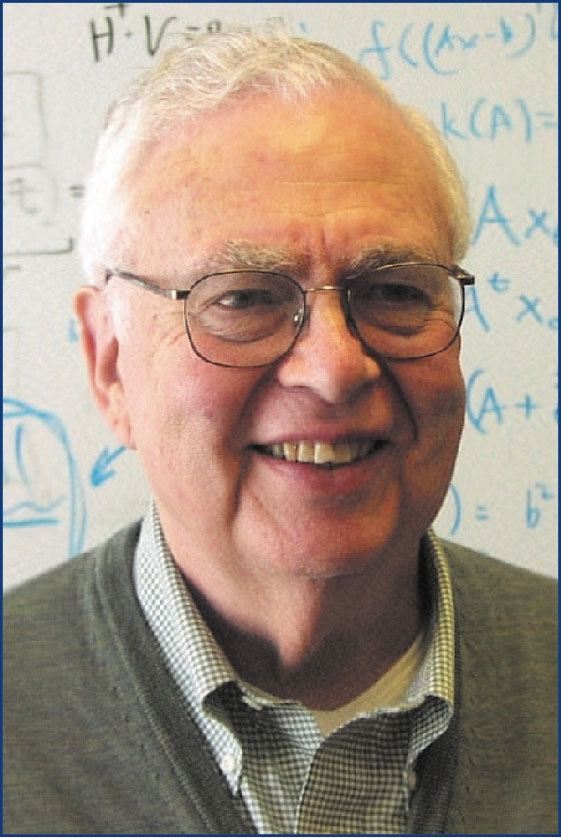

In [110]:
img = load("golub-561-838-rank-120.jpg")

In [111]:
channels = float(channelview(img))
size(channels)

(3, 838, 561)

In [112]:
channels[3, :, :]

838×561 Matrix{Float32}:
 0.482353  0.482353  0.482353  0.439216  …  0.478431  0.458824  0.478431
 0.482353  0.470588  0.447059  0.431373     0.466667  0.482353  0.478431
 0.482353  0.447059  0.423529  0.54902      0.435294  0.435294  0.470588
 0.443137  0.431373  0.54902   0.984314     0.537255  0.470588  0.470588
 0.490196  0.435294  0.482353  0.968627     0.486275  0.427451  0.470588
 0.454902  0.427451  0.47451   0.968627  …  0.490196  0.466667  0.470588
 0.498039  0.458824  0.47451   0.952941     0.490196  0.458824  0.470588
 0.501961  0.447059  0.47451   0.968627     0.517647  0.462745  0.470588
 0.478431  0.427451  0.490196  0.968627     0.498039  0.458824  0.470588
 0.466667  0.423529  0.498039  0.980392     0.501961  0.466667  0.470588
 ⋮                                       ⋱                      ⋮
 0.494118  0.431373  0.388235  0.415686     0.407843  0.431373  0.466667
 0.486275  0.431373  0.392157  0.423529  …  0.411765  0.439216  0.466667
 0.47451   0.423529  0.396078  0.

In [113]:
function rank_approx(F::SVD, k)
    U, S, Vt = F.U, F.S, F.Vt
    M = U[:, 1:k] * Diagonal(S[1:k]) * Vt[1:k, :]
    M .= clamp.(M, 0.0, 1.0)
end
svdfactors = (svd(channels[1, :, :]), svd(channels[2, :, :]), svd(channels[3, :, :]))

(SVD{Float32, Float32, Matrix{Float32}, Vector{Float32}}(Float32[-0.0031972528 -0.0029688813 … 0.018361608 -0.004374091; -0.004179895 -0.0039786696 … -0.07698881 0.014044292; … ; -0.0063421293 -0.00609195 … 0.0005091778 -0.017522527; -0.046186578 -0.03855717 … 0.00027985126 0.001053175], Float32[468.88797, 54.572277, 39.715485, 28.825445, 22.580225, 19.784304, 18.39853, 16.7467, 15.208007, 13.955464  …  0.019829515, 0.019352568, 0.019001927, 0.0185152, 0.018378692, 0.018156195, 0.017283252, 0.017244196, 0.016644686, 0.016375538], Float32[-0.00380523 -0.0049679875 … -0.005103425 -0.004315849; -0.0008207854 -0.0009991545 … -0.0010606109 -0.00087699044; … ; 0.014440129 -0.018268976 … -0.019050477 0.007218347; -0.018245153 -0.06433408 … 0.018115401 0.027739096]), SVD{Float32, Float32, Matrix{Float32}, Vector{Float32}}(Float32[-0.012608945 -0.016334983 … -0.06462097 -0.00041164798; -0.012318522 -0.016402178 … 0.07253768 0.060031664; … ; -0.011948416 -0.016418198 … -0.0007675695 0.041439675;

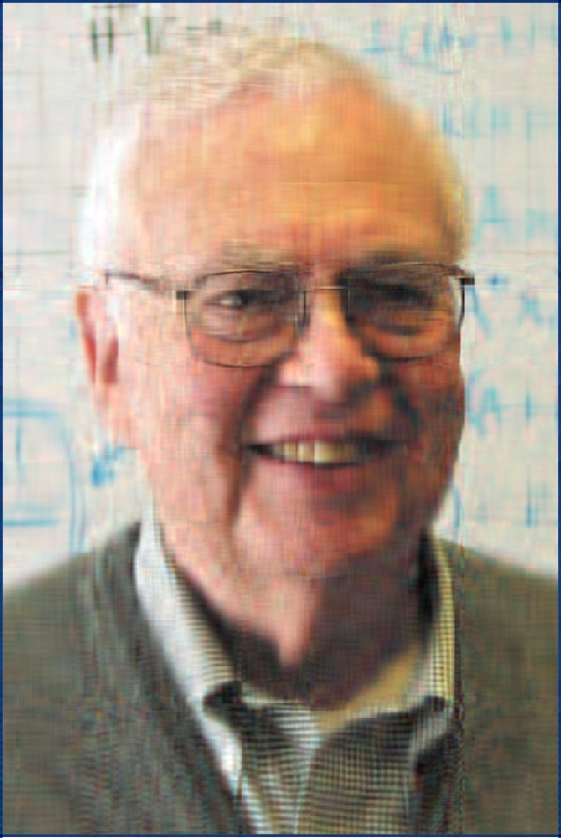

In [114]:
k1, k2, k3 = 25, 25, 25
colorview(RGB,
    rank_approx(svdfactors[1], k1),
    rank_approx(svdfactors[2], k2),
    rank_approx(svdfactors[3], k3)
)

- SVD has some inherent optimality properties. It prescribes how to approximate a general matrix $\mathbf{A}$ by a low rank matrix.

- Before talking about approximation, we need a metric that measures the quality of approximation. We discuss 3 matrix norms.

    - **Spectral norm** or $\ell_2$ norm:
$$
\|\mathbf{A}\|_2 = \max \frac{\|\mathbf{A} \mathbf{x}\|}{\|\mathbf{x}\|} = \sigma_1.
$$

    - **Frobenius norm**:
$$
\|\mathbf{A}\|_{\text{F}} = \sqrt{\sum_{i,j} a_{ij}^2} = \sqrt{\text{tr}(\mathbf{A}' \mathbf{A})} = \sqrt{\sigma_1^2 + \cdots + \sigma_r^2}.
$$

    - **Nuclear norm**:
$$
\|\mathbf{A}\|_{\text{nuc}} = \sigma_1 + \cdots + \sigma_r.
$$

- These 3 norms already have different values for the identity matrix:
\begin{eqnarray*}
    \|\mathbf{I}_n\|_2 &=& 1 \\
    \|\mathbf{I}_n\|_{\text{F}} &=& \sqrt{n} \\
    \|\mathbf{I}_n\|_{\text{nuc}} &=& n.
\end{eqnarray*}
Indeed for any orthogonal matrix $\mathbf{Q} \in \mathbb{R}^{n \times n}$,
\begin{eqnarray*}
    \|\mathbf{Q}\|_2 &=& 1 \\
    \|\mathbf{Q}\|_{\text{F}} &=& \sqrt{n} \\
    \|\mathbf{Q}\|_{\text{nuc}} &=& n.
\end{eqnarray*}

- **Invariance under orthogonal transform.** For all three norms,
$$
\|\mathbf{Q}_1 \mathbf{A} \mathbf{Q}_2'\| = \|\mathbf{A}\| \text{ for orthogonal } \mathbf{Q}_1 \text{ and } \mathbf{Q}_2.
$$

    Proof: HW7.

- **Eckart-Young theorem.** Assuming SVD of $\mathbf{A} \in \mathbb{R}^{m \times n}$ with rank $r$:
$$
\mathbf{A} = \mathbf{U} \boldsymbol{\Sigma} \mathbf{V}' = \sum_{i=1}^r \sigma_i \mathbf{u}_i \mathbf{v}_i'.
$$
Then the matrix
$$
\mathbf{A}_k = \sum_{i=1}^k \sigma_i \mathbf{u}_i \mathbf{v}_i'
$$
is the best rank-$k$ approximation to the original matrix $\mathbf{A}$ in the 3 matrix norms ($\ell_2$, Frobenius, and nuclear). More precisely,
$$
\|\mathbf{A} - \mathbf{B}\|
$$
is minimized by $\mathbf{A}_k$ among all matrices $\mathbf{B}$ with rank $\le k$.

- **Proof of Eckart-Young theorem for the $\ell_2$ norm.** (optional)

    First we note
$$
\|\mathbf{A} - \mathbf{A}_k\|_2 = \left\|\sum_{i=1}^r \sigma_i \mathbf{u}_i \mathbf{v}_i' - \sum_{i=1}^k \sigma_i \mathbf{u}_i \mathbf{v}_i' \right\|_2 = \left\|\sum_{i=k+1}^r \sigma_i \mathbf{u}_i \mathbf{v}_i' \right\|_2 = \sigma_{k+1}.
$$
We want to show that
$$
\|\mathbf{A} - \mathbf{B}\|_2 = \max \frac{\|(\mathbf{A} - \mathbf{B}) \mathbf{x}\|}{\|\mathbf{x}\|} \ge \sigma_{k+1}
$$
for any $\mathbf{B}$ with $\text{rank}(\mathbf{B}) \le k$. We show this by choosing a particular $\mathbf{x}$ such that 
$$
\frac{\|(\mathbf{A} - \mathbf{B}) \mathbf{x}\|}{\|\mathbf{x}\|} \ge \sigma_{k+1}.
$$
Choose $\mathbf{x} \ne \mathbf{0}$ such that 
$$
\mathbf{B} \mathbf{x} = \mathbf{0} \text{ and } \mathbf{x} = \sum_{i=1}^{k+1} c_i \mathbf{v}_i.
$$
There exists such $\mathbf{x}$ because (1) $\mathcal{N}(\mathbf{B})$ has dimension $\ge n-k$ because $\text{rank}(\mathbf{B}) \le k$ (rank-nullity theorem) and (2) $\mathbf{v}_1, \ldots, \mathbf{v}_{k+1}$ span a subspace of dimension $k+1$. Thus $\mathcal{N}(\mathbf{B})$ and $\text{span}\{\mathbf{v}_1, \ldots, \mathbf{v}_{k+1}\}$ has a non-trivial intersection. For this $\mathbf{x}$, we have
\begin{eqnarray*}
& & \|(\mathbf{A} - \mathbf{B}) \mathbf{x}\|^2 \\
&=& \|\mathbf{A} \mathbf{x}\|^2 \\
&=& \left\|\left(\sum_{i=1}^r \sigma_i \mathbf{u}_i \mathbf{v}_i'\right)\left(\sum_{i=1}^{k+1} c_i \mathbf{v}_i\right)\right\|^2 \\
&=& \left\| \sum_{i=1}^{k+1} c_i \sigma_i \mathbf{u}_i \right\|^2 \\
&=& \sum_{i=1}^{k+1} c_i^2 \sigma_i^2 \\
&\ge& \left(\sum_{i=1}^{k+1} c_i^2\right) \sigma_{k+1}^2 \\
&=& \|\mathbf{x}\|^2 \sigma_{k+1}^2.
\end{eqnarray*}
The proof is finished.

- **(Nathan Srebro's) Proof of Eckart-Young theorem for the Frobenius norm.** (optional)

    Let $\mathbf{B}$ be a matrix of rank $k$. By the rank factorization, $\mathbf{B} = \mathbf{C} \mathbf{R}$, where $\mathbf{C} \in \mathbb{R}^{m \times k}$ and $\mathbf{R} \in \mathbb{R}^{k \times n}$. Using SVD of $\mathbf{B}$, we will assume that $\mathbf{C}$ has orthogonal columns (so $\mathbf{C}' \mathbf{C} = \mathbf{D}$) and $\mathbf{R}$ has orthonormal rows (so $\mathbf{R} \mathbf{R}' = \mathbf{I}_k$). We want to show $\mathbf{C} = \mathbf{U}_k \boldsymbol{\Sigma}_k$ and $\mathbf{R} = \mathbf{V}_k'$, where $(\boldsymbol{\Sigma}_k, \mathbf{U}_k, \mathbf{V}_k)$ are the top $k$ singular values/vectors of $\mathbf{A}$. 
    In order for $\mathbf{B} = \mathbf{C} \mathbf{R}$ to minimize
$$
f(\mathbf{C}, \mathbf{R}) = \|\mathbf{A} - \mathbf{C} \mathbf{R}\|_{\text{F}}^2,
$$
the gradient (partial derivatives) must vanish
\begin{eqnarray*}
    \frac{\partial f(\mathbf{C}, \mathbf{R})}{\partial \mathbf{C}} &=& - 2(\mathbf{A} - \mathbf{C} \mathbf{R}) \mathbf{R}' = \mathbf{O}_{m \times k} \\
\frac{\partial f(\mathbf{C}, \mathbf{R})}{\partial \mathbf{R}} &=& - 2 \mathbf{C}' (\mathbf{A} - \mathbf{C} \mathbf{R})  = \mathbf{O}_{k \times n}.
\end{eqnarray*}
The first equation shows
$$
\mathbf{A} \mathbf{R}' = \mathbf{C} \mathbf{R} \mathbf{R}' = \mathbf{C}.
$$
Then by the second equation
$$
\mathbf{A}' \mathbf{A} \mathbf{R}' = \mathbf{A}' \mathbf{C} =  \mathbf{R}' \mathbf{C}' \mathbf{C} = \mathbf{R}' \mathbf{D}.
$$
This says the columns of $\mathbf{R}'$ (rows of $\mathbf{R}$) must be eigenvectors of $\mathbf{A}' \mathbf{A}$, or equivalently, right singular vectors $\mathbf{v}_i$ of $\mathbf{A}$. Similarly the columns of $\mathbf{C}$ must be eigenvectors of $\mathbf{A} \mathbf{A}'$, or equivalently, left singular vectors $\mathbf{u}_i$ of $\mathbf{A}$:
$$
\mathbf{A} \mathbf{A}' \mathbf{C} = \mathbf{A} \mathbf{R}' \mathbf{D} = \mathbf{C} \mathbf{D}.
$$
Which $\mathbf{u}_i$ and $\mathbf{v}_i$ shall we take to minimize $f$? Apparently we should choose those with largest singular values to achieve the minimum value $\sigma_{k+1}^2 + \cdots + \sigma_r^2$.

## Singular vectors and Rayleigh quotient

- Goal: Maximize the **Rayleigh quotient**
$$
\text{maximize} \quad f(\mathbf{x}) = \frac{\|\mathbf{A} \mathbf{x}\|^2}{\|\mathbf{x}\|^2} = \frac{\mathbf{x}' \mathbf{A}' \mathbf{A} \mathbf{x}}{\mathbf{x}' \mathbf{x}} = \frac{\mathbf{x}' \mathbf{S} \mathbf{x}}{\mathbf{x}' \mathbf{x}}.
$$

- Let's calculate the partial derivatives of the objective function $f(\mathbf{x})$
$$
\frac{\partial f(\mathbf{x})}{\partial x_i} = \frac{\left(2\sum_j s_{ij} x_j\right) (\mathbf{x}' \mathbf{x}) - (\mathbf{x}' \mathbf{S} \mathbf{x}) (2x_i)}{(\mathbf{x}' \mathbf{x})^2} = 2 (\mathbf{x}' \mathbf{x})^{-1} \left(\sum_j s_{ij} x_j - f(\mathbf{x}) x_i \right).
$$
Collecting partial derivatives into the gradient vector and setting it to zero
$$
\nabla f(\mathbf{x}) = 2 (\mathbf{x}' \mathbf{x})^{-1} \left[ \mathbf{S} \mathbf{x} - f(\mathbf{x}) \cdot \mathbf{x} \right] = \mathbf{0}
$$
yields
$$
\mathbf{S} \mathbf{x} = f(\mathbf{x}) \cdot \mathbf{x}.
$$
Thus the optimal $\mathbf{x}$ must be an eigenvector of $\mathbf{S} = \mathbf{A}' \mathbf{A}$ with corresponding eigenvalue $f(\mathbf{x})$. Which one shall we choose? Apparently the **top right singular vector** $\mathbf{x}^\star = \mathbf{v}_1$ gives us the maximal value which is equal to $\lambda_1 = \sigma_1^2$.

    In HW6, you show this result using an alternative proof (elementary linear algebra arguments).

- Above we have shown
$$
\max_{\mathbf{x} \ne \mathbf{0}} \frac{\|\mathbf{A} \mathbf{x}\|}{\|\mathbf{x}\|} = \sigma_1,
$$
which is the spectral norm (or $\ell_2$ norm) of a matrix $\mathbf{A}$.

In [115]:
Random.seed!(216)
m, n, r = 5, 3, 2
A = randn(m, r) * randn(r, n)

5×3 Matrix{Float64}:
  1.19194   -1.06587    -0.282852
 -0.782863   0.582771    0.49484
  1.35372   -0.920401   -1.08576
  0.629091  -0.529823   -0.235526
 -0.129245   0.0789172   0.127265

In [116]:
x = randn(n)
norm(A * x) / norm(x)

1.3019523541430873

In [117]:
Asvd = svd(A)

SVD{Float64, Float64, Matrix{Float64}, Vector{Float64}}
U factor:
5×3 Matrix{Float64}:
 -0.550507    0.73403   -0.377853
  0.382519    0.107063  -0.581891
 -0.677041   -0.623757  -0.294483
 -0.296395    0.223011   0.647996
  0.0662395   0.104547   0.109596
singular values:
3-element Vector{Float64}:
 2.8564495864018364
 0.5518082957047505
 9.264786667098172e-17
Vt factor:
3×3 Matrix{Float64}:
 -0.723686   0.558421  0.405518
  0.133192  -0.463537  0.87601
  0.677155   0.687968  0.261078

In [118]:
x = Asvd.Vt[1, :]
norm(A * x) / norm(x)

2.8564495864018364

- Similarly, the **second right singular vector** maximizes the Rayleigh quotient subject to an orthogonality constraint
\begin{eqnarray*}
\text{maximize} &\quad& f(\mathbf{x}) = \frac{\|\mathbf{A} \mathbf{x}\|^2}{\|\mathbf{x}\|^2} = \frac{\mathbf{x}' \mathbf{A}' \mathbf{A} \mathbf{x}}{\mathbf{x}' \mathbf{x}} = \frac{\mathbf{x}' \mathbf{S} \mathbf{x}}{\mathbf{x}' \mathbf{x}} \\
\text{subject to} &\quad& \mathbf{x} \perp \mathbf{v}_1.
\end{eqnarray*}
    
- **Submatrices have smaller singular values**. Let $\mathbf{B}$ be a submatrix of $\mathbf{A} \in \mathbb{R}^{m \times n}$. Then
$$
\|\mathbf{B}\| \le \|\mathbf{A}\|
$$
or equivalently
$$
\sigma_1 (\mathbf{B}) \le \sigma_1 (\mathbf{A}).
$$

    Proof: Let $\tilde{\mathbf{y}} \in \mathbb{R}^n$ hold corresponding entries in $\mathbf{y}$ and be zero elsewhere. Then
$$
\sigma_1 (\mathbf{B}) = \max_{\mathbf{y}} \frac{\|\mathbf{B} \mathbf{y}\|}{\|\mathbf{y}\|} \le \max_{\tilde{\mathbf{y}}} \frac{\|\mathbf{A} \tilde{\mathbf{y}}\|}{\|\tilde{\mathbf{y}}\|} \le \max_{\mathbf{x}} \frac{\|\mathbf{A} \mathbf{x}\|}{\|\mathbf{x}\|} = \sigma_1 (\mathbf{A}).
$$

In [119]:
svd(A[1:3, 1:2])

SVD{Float64, Float64, Matrix{Float64}, Vector{Float64}}
U factor:
3×2 Matrix{Float64}:
 -0.642327  -0.744931
  0.392978  -0.118181
 -0.658015   0.656591
singular values:
2-element Vector{Float64}:
 2.4830729640498834
 0.15272120046204693
Vt factor:
2×2 Matrix{Float64}:
 -0.790967  0.611858
  0.611858  0.790967

## Principal component analysis (PCA)

- PCA is a dimension reduction technique that finds the most informative linear combinations of the $p$ random variables $\mathbf{X} \in \mathbb{R}^p$. Mathematically it finds the linear combinations of the $p$ random variables that have the largest variances. If we know the population covariance of the $p$ variables is $\text{Cov}(\mathbf{X}) = \boldsymbol{\Sigma} \in \mathbb{R}^{p \times p}$, then
$$
\text{Var}(\mathbf{a}' \mathbf{X}) = \mathbf{a}' \text{Cov}(\mathbf{X}) \mathbf{a} = \mathbf{a}' \boldsymbol{\Sigma} \mathbf{a}.
$$
Apparently the larger magnitude of $\mathbf{a}$, the large variance $\text{Var}(\mathbf{a}' \mathbf{X})$. It makes sense to maximize the normalized version
$$
\text{maximize} \quad \frac{\mathbf{a}' \boldsymbol{\Sigma} \mathbf{a}}{\mathbf{a}' \mathbf{a}}.
$$

- Given a data matrix $\mathbf{X} \in \mathbb{R}^{n \times p}$, where there are $n$ observations of $p$ variables. We would substitute in the sample covariance matrix
$$
\widehat{\boldsymbol{\Sigma}} = \frac{\tilde{\mathbf{X}}'\tilde{\mathbf{X}}}{n-1},
$$
where $\tilde{\mathbf{X}}$ is the column-centered data, and maximize the Rayleigh quotient
$$
\text{maximize} \quad \frac{\mathbf{a}' \widehat{\boldsymbol{\Sigma}} \mathbf{a}}{\mathbf{a}' \mathbf{a}}.
$$
From earlier discussion we know the optimal $\mathbf{a}^\star$ maximizing this Rayleigh quotient is the top eigenvector of $\widehat{\boldsymbol{\Sigma}}$, or equivalently, the top right singular vector $\mathbf{v}_1$ of $\tilde{\mathbf{X}}$, achieving the optimal value $\lambda_1$.

    Similarly, right singular vectors $\mathbf{v}_k$ maximizes
$$
\frac{\mathbf{a}' \widehat{\boldsymbol{\Sigma}} \mathbf{a}}{\mathbf{a}' \mathbf{a}}
$$
subject to the constraint $\mathbf{a} \perp \mathbf{v}_i$ for $i =1,\ldots,k-1$.

- Coumns of 
$$
\mathbf{V}_r = \begin{pmatrix} \mid & & \mid \\
\mathbf{v}_1 & \cdots & \mathbf{v}_r \\
\mid & & \mid
\end{pmatrix} \in \mathbb{R}^{p \times r}
$$ 
are called the **principal components**.

- Columns of $\tilde{\mathbf{X}} \mathbf{V}_r \in \mathbb{R}^{n \times r}$ are called the **principal scores**.

## PCA example: Fisher's Iris data

In [120]:
# load iris dataset
iris = dataset("datasets", "iris")

Row,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
,Float64,Float64,Float64,Float64,Cat…
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa
7,4.6,3.4,1.4,0.3,setosa
8,5.0,3.4,1.5,0.2,setosa
9,4.4,2.9,1.4,0.2,setosa


In [121]:
# retrieve features and labels
X_labels = convert(Vector, iris[!, 5])

150-element Vector{CategoricalArrays.CategoricalValue{String, UInt8}}:
 "setosa"
 "setosa"
 "setosa"
 "setosa"
 "setosa"
 "setosa"
 "setosa"
 "setosa"
 "setosa"
 "setosa"
 ⋮
 "virginica"
 "virginica"
 "virginica"
 "virginica"
 "virginica"
 "virginica"
 "virginica"
 "virginica"
 "virginica"

In [122]:
# retrieve the 4 continuous features
X = (ModelMatrix(ModelFrame(
    @formula(1 ~ 1 + SepalLength + SepalWidth + PetalLength + PetalWidth + Species), 
    iris,
    contrasts = Dict(:Species => StatsModels.FullDummyCoding()))).m)[:, 2:5]

150×4 Matrix{Float64}:
 5.1  3.5  1.4  0.2
 4.9  3.0  1.4  0.2
 4.7  3.2  1.3  0.2
 4.6  3.1  1.5  0.2
 5.0  3.6  1.4  0.2
 5.4  3.9  1.7  0.4
 4.6  3.4  1.4  0.3
 5.0  3.4  1.5  0.2
 4.4  2.9  1.4  0.2
 4.9  3.1  1.5  0.1
 ⋮              
 6.9  3.1  5.1  2.3
 5.8  2.7  5.1  1.9
 6.8  3.2  5.9  2.3
 6.7  3.3  5.7  2.5
 6.7  3.0  5.2  2.3
 6.3  2.5  5.0  1.9
 6.5  3.0  5.2  2.0
 6.2  3.4  5.4  2.3
 5.9  3.0  5.1  1.8

In [123]:
# center but not scale
X̃ = zscore(X, mean(X, dims=1), ones(1, size(X, 2)))

150×4 Matrix{Float64}:
 -0.743333    0.442667   -2.358  -0.999333
 -0.943333   -0.0573333  -2.358  -0.999333
 -1.14333     0.142667   -2.458  -0.999333
 -1.24333     0.0426667  -2.258  -0.999333
 -0.843333    0.542667   -2.358  -0.999333
 -0.443333    0.842667   -2.058  -0.799333
 -1.24333     0.342667   -2.358  -0.899333
 -0.843333    0.342667   -2.258  -0.999333
 -1.44333    -0.157333   -2.358  -0.999333
 -0.943333    0.0426667  -2.258  -1.09933
  ⋮                              
  1.05667     0.0426667   1.342   1.10067
 -0.0433333  -0.357333    1.342   0.700667
  0.956667    0.142667    2.142   1.10067
  0.856667    0.242667    1.942   1.30067
  0.856667   -0.0573333   1.442   1.10067
  0.456667   -0.557333    1.242   0.700667
  0.656667   -0.0573333   1.442   0.800667
  0.356667    0.342667    1.642   1.10067
  0.0566667  -0.0573333   1.342   0.600667

In [124]:
# Xsvd.V contains the principal components
Xsvd = svd(X̃)
Xsvd.V

4×4 adjoint(::Matrix{Float64}) with eltype Float64:
  0.361387   -0.656589   0.58203     0.315487
 -0.0845225  -0.730161  -0.597911   -0.319723
  0.856671    0.173373  -0.0762361  -0.479839
  0.358289    0.075481  -0.545831    0.753657

In [125]:
# compute the top 3 principal scores
Y = X̃ * Xsvd.V[:, 1:3]

150×3 Matrix{Float64}:
 -2.68413  -0.319397    0.0279148
 -2.71414   0.177001    0.210464
 -2.88899   0.144949   -0.0179003
 -2.74534   0.318299   -0.0315594
 -2.72872  -0.326755   -0.0900792
 -2.28086  -0.74133    -0.168678
 -2.82054   0.0894614  -0.257892
 -2.62614  -0.163385    0.0218793
 -2.88638   0.578312   -0.0207596
 -2.67276   0.113774    0.197633
  ⋮                    
  1.92227  -0.409203   -0.113587
  1.41524   0.574916   -0.296323
  2.56301  -0.277863   -0.29257
  2.41875  -0.304798   -0.504483
  1.94411  -0.187532   -0.177825
  1.52717   0.375317    0.121898
  1.76435  -0.0788589  -0.130482
  1.90094  -0.116628   -0.723252
  1.39019   0.282661   -0.36291

In [126]:
# group results by testing set labels for color coding
setosa     = Y[X_labels .== "setosa"    , :]
versicolor = Y[X_labels .== "versicolor", :]
virginica  = Y[X_labels .== "virginica" , :];

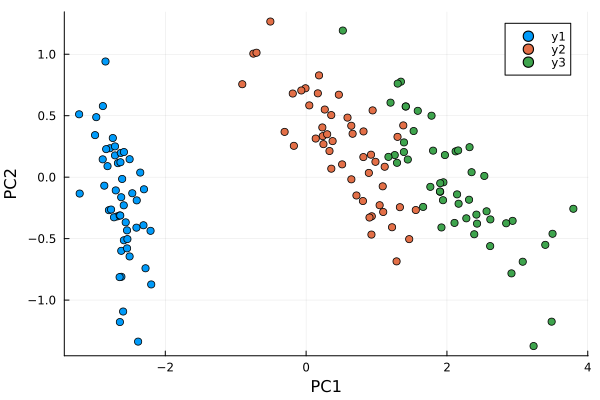

In [127]:
# visualize first 2 principal components in 2D interacive plot
p = scatter(setosa[:, 1], setosa[:, 2], marker=:circle, linewidth=0)
scatter!(versicolor[:, 1], versicolor[:, 2], marker=:circle, linewidth=0)
scatter!(virginica[:, 1], virginica[:, 2], marker=:circle, linewidth=0)
plot!(p, xlabel="PC1", ylabel="PC2")

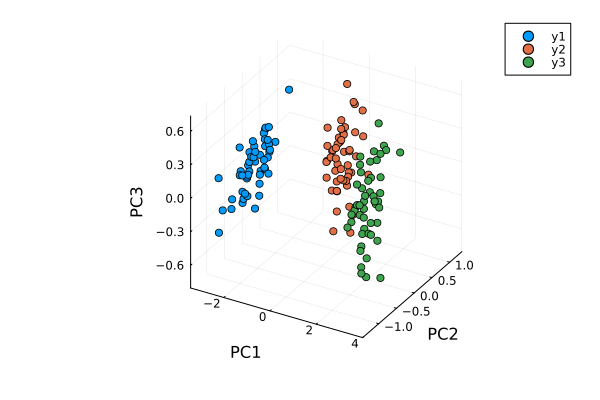

In [128]:
# visualize first 3 principal components in 3D interacive plot
p = scatter(setosa[:, 1], setosa[:, 2], setosa[:, 3], marker=:circle, linewidth=0)
scatter!(versicolor[:, 1], versicolor[:, 2], versicolor[:, 3], marker=:circle, linewidth=0)
scatter!(virginica[:, 1], virginica[:, 2], virginica[:, 3], marker=:circle, linewidth=0)
plot!(p, xlabel="PC1", ylabel="PC2", zlabel="PC3")

## PCA example: genomics

<img src="https://media.springernature.com/full/springer-static/image/art%3A10.1038%2Fnature07331/MediaObjects/41586_2008_Article_BFnature07331_Fig1_HTML.jpg?as=webp" width="400" align="center"/>

Above picture is from the article [Genes mirror geography within Europe](http://www.nature.com/nature/journal/v456/n7218/full/nature07331.html) by Novembre et al (2008) published in _Nature_.  

## Matrix completion

Missing data is ubiquitous. Matrix completion (a hot topic in machine learning) aims to recover the missing values in a huge matrix. 

Candes and Tao proposes a technique to complete a matrix $\mathbf{Y}$ with a large number of missing entries by an optimization problem
\begin{eqnarray*}
    &\text{minimize}& \|\mathbf{X}\|_{\text{nuc}} \\
    &\text{subject to }& x_{ij}=y_{ij} \text{ for all observed entries} y_{ij}.
\end{eqnarray*}
That is we seek the matrix with minimal nuclear norm that agrees with the observed entries.

See an example [here](https://ucla-biostat-257-2020spring.github.io/slides/22-juliaopt/juliaopt.html#Example:-matrix-completion).

## Compressed sensing

See an example [here](https://ucla-biostat-257-2020spring.github.io/slides/29-lp/lp.html#LP-example:-compressed-sensing).